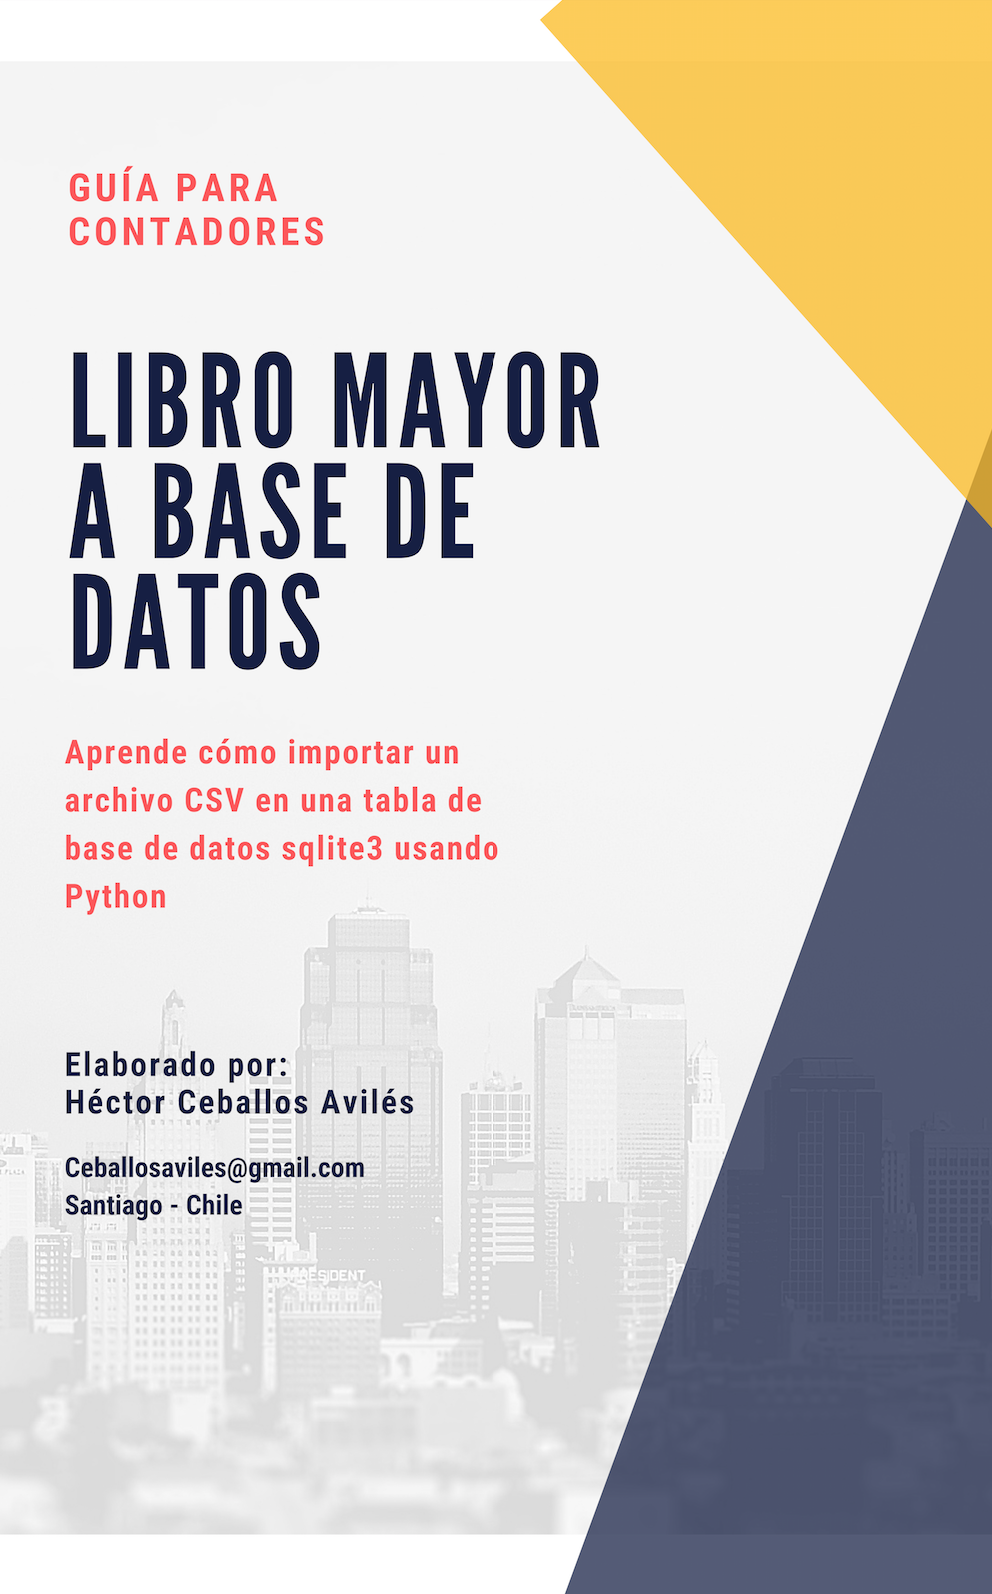

In [46]:
from IPython.display import Image
Image(filename='Libro_mayor_a_base_de_datos.png')

¡Hola! Soy Héctor.  

Soy Contador Auditor, y me encanta la música, el ajedrez, y más recientemente tengo una obsesión con el lenguaje de programación Python. Tanto es así que decidí iniciar un blog divertido para documentar mis aventuras explorando su utilidad en el mundo de la contabilidad.  


Si eres un contador que nunca ha oído hablar de Python o si has oído hablar de él pero no lo has usado, este es el blog para ti.  Te aliento a dejar comentarios y sugerencias sobre temas futuros para que podamos explorar Python juntos. 

Envíame cualquier idea que tengas a ceballosaviles@gmail.com.

Las publicaciones estarán en mi [Github] https://github.com/hceballos, en una de las siguientes categorías: 

#### •	Contador Auditor.
#### •	Control de Gestión.
#### •	Análisis de Datos.  

Siéntete libre de descargar y utilizar mi contenido.   


Saludos,
    <br>
#### Héctor Ceballos Avilés
#### ------------------------------------------------------------------------------------------------------------------




  
Sin vueltas, vamos al grano.

### ¿QUÉ se quiere hacer?
Vamos a leer el libro mayor contable en formato .csv y luego haremos una base de datos con esa información.

### ¿POR QUÉ se quiere hacer?

**Es Compacto** : Ahorramos tener varios archivos con información dispersa.
    
**Es Rápido** : Python puede obtener y modificar datos con mucha mayor velocidad que otros formatos de archivo. Así es posible satisfacer con rapidez consultas particulares del momento, sin necesidad de búsquedas visuales o procesos que requieren mucho tiempo.  

**Es menos laborioso** : Las tareas mecánicas siempre serán mejor realizadas por las máquinas.  

**Es Actual** : Se dispone en cualquier momento de información precisa y al día.  

**Cómodo** : Al tener la información en un mismo sitio, ahorraremos tiempo y trabajo.

### ¿PARA QUÉ se quiere hacer?
Para realizar consultas de información (mostrar, insertar, actualizar y borrar datos).

### ¿CUÁNTO se quiere hacer?
METAS<br>
1) Reemplazar los procesos altamente manuales que muchas personas usan para manipular datos en Excel y/o Access.<br>
2) Potenciar el rendimiento en el análisis de información.

### ¿CÓMO se va hacer?
1) Importación de módulo sqlite3.<br>
2) Lectura de libro mayor en formato .csv (Aproximadamente 14.000 registros en menos de 2 segundos).<br>
3) Crear una base de datos.<br>
4) Crear una tabla en la base de datos.<br>
5) Limpiar de información innecesaria (Líneas en blanco), usando expresiones regulares.<br>
6) Dar nuevo formato a columna Fecha (Año-Mes-Día), usando expresiones regulares.<br>
7) Normalizar información, transformando caracteres especiales, usando expresiones regulares.<br>
8) Insertar los registros leídos de Libro mayor a la base de datos.<br>
9) Confirmar la creación de una base de datos ("fichero".db), con toda la información del libro mayor.<br>

### ¿A QUIÉNES va dirigido?
Esta guía está dirigida a todos aquellos contadores y profesionales en general que buscan ampliar sus conocimientos sobre el manejo de grandes volúmenes de información, generar información util y aumentar el rendimiento del trabajo diario.

### Código Completo:
El código tambien está disponible en mi Github (https://github.com/hceballos/Contador-Auditor)  
Siéntete libre de descargar y utilizar mi contenido.

In [47]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
import codecs
# 1) Importacion de módulo sqlite3.
import sqlite3
import re

class InputCCostos():
    #4) Crear una tabla en la base de datos.
    TABLE_NAME = 'MovimientosTabla'

    TABLE_COLUMN_CUENTA = "CUENTA"
    TABLE_COLUMN_FECHA = "FECHA"
    TABLE_COLUMN_N_COMPROBANTE = "N_COMPROBANTE"
    TABLE_COLUMN_TIPO = "TIPO"
    TABLE_COLUMN_N_INTERNO = "N_INTERNO"
    TABLE_COLUMN_PRESUP_DE_CAJA = "PRESUP_DE_CAJA"
    TABLE_COLUMN_CENTRO_DE_COSTO = "CENTRO_DE_COSTO"
    TABLE_COLUMN_AUXILIAR = "AUXILIAR"
    TABLE_COLUMN_TIPO_DOC = "TIPO_DOC"
    TABLE_COLUMN_NUMERO_DOC = "NUMERO_DOC"
    TABLE_COLUMN_DETDE_GASTO_INSTFINANCIERO = "DETDE_GASTO_INSTFINANCIERO"
    TABLE_COLUMN_DEBE = "DEBE"
    TABLE_COLUMN_HABER = "HABER"
    TABLE_COLUMN_SALDO = "SALDO"
    TABLE_COLUMN_DESCRIPCION = "DESCRIPCION"

    def __init__(self, dataBaseFileName):
        #3) Crear una base de datos.
        self.dataBaseFileName = dataBaseFileName
        print "Base de Datos - Asignacion de nombre de base de datos FILE_DB = 'data.db'"

        self.conection = sqlite3.connect(self.dataBaseFileName)
        self.conection.text_factory = str

        self.cursor = self.conection.cursor()
        print "Base de Datos - conector con base de datos"

        self.cursor.execute(
            'DROP TABLE IF EXISTS {}'.format(
                self.TABLE_NAME
            )
        )

        self.cursor.execute(
            'CREATE TABLE {} ({} TEXT, {} TEXT, {} INTEGER, {} TEXT, {} INTEGER, {} INTEGER NULL, {} TEXT, {} TEXT, {} TEXT, {} INTEGER, {} INTEGER NULL, {} INTEGER, {} INTEGER, {} INTEGER, {} TEXT)'
                .format(
                    self.TABLE_NAME,
                    self.TABLE_COLUMN_CUENTA,
                    self.TABLE_COLUMN_FECHA,
                    self.TABLE_COLUMN_N_COMPROBANTE,
                    self.TABLE_COLUMN_TIPO,
                    self.TABLE_COLUMN_N_INTERNO,
                    self.TABLE_COLUMN_PRESUP_DE_CAJA,
                    self.TABLE_COLUMN_CENTRO_DE_COSTO,
                    self.TABLE_COLUMN_AUXILIAR,
                    self.TABLE_COLUMN_TIPO_DOC,
                    self.TABLE_COLUMN_NUMERO_DOC,
                    self.TABLE_COLUMN_DETDE_GASTO_INSTFINANCIERO,
                    self.TABLE_COLUMN_DEBE,
                    self.TABLE_COLUMN_HABER,
                    self.TABLE_COLUMN_SALDO,
                    self.TABLE_COLUMN_DESCRIPCION
            )
        )

        self.conection.commit()
        print "Base de Datos - Asignacion de columnas"
        self.saveRegisters()

    def saveRegisters(self):
        registers = []
        print "Base de Datos - Lectura de Libro mayor y almacenando en registers"
        # 2) Lectura de libro mayor en formato .csv
        with codecs.open("2013.csv", "r",encoding='utf-8', errors='ignore') as infile:
            for line in infile:
                line = line.strip()                     
                line = line.replace('"', '')                
                data = line.split(";")                      
                registers.append(data)

        for register in registers[11:]:
            #5) Limpiar de informacion innecesaria (Lineas en blanco)
            if self._isRowUseful(register):
                #strip out spaces
                register = self._stripColumns(register)
                #6) Dar nuevo formato a columna Fecha 
                register[1] = self._normalizeDate(register[1])
                #7) Normalizar informacion, transformando caracteres especiales
                register[0] = self._normalizeSlash(register[0])
                register[0] = self._normalizeGuionBajo(register[0])

                #8) Insertar los registros leidos de Libro mayor a la base de datos.
                self.conection.execute(
                    'INSERT INTO {} VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)'.format(
                        self.TABLE_NAME
                    ),
                    register
                )

        self.conection.commit()
        print "Base de Datos - salvar los datos de 'registers' en base de datos"


    def _isRowUseful(self, row):
        firstColumn = row[0]

        emptyRegexp = re.compile('^\s*$|^SALDO')
        if emptyRegexp.match(firstColumn):
            return False

        return True

    def _stripColumns(self, row):
        return [column.strip() for column in row]

    def _normalizeDate(self, dateString):
        return re.sub('(\d{2}).(\d{2}).(\d{2})?(\d{2})', '20\g<4>-\g<2>-\g<1>', dateString)

    def _normalizeSlash(self, dateSLash):
        return re.sub("/", "-", dateSLash)

    def _normalizeGuionBajo(self, dateSLash):
        return re.sub("_", "", dateSLash)


    #9) Confirmar la creacion de una base de datos
    #Nota : el fichero llamado 'data.db' aparecerá en la misma carpera dónde está éste código.
    
if __name__ == '__main__':

    FILE_DB = 'data.db'

    InputCCostos = InputCCostos(FILE_DB)

Base de Datos - Asignacion de nombre de base de datos FILE_DB = 'data.db'
Base de Datos - conector con base de datos
Base de Datos - Asignacion de columnas
Base de Datos - Lectura de Libro mayor y almacenando en registers
Base de Datos - salvar los datos de 'registers' en base de datos
